In [ ]:
# Use data from Google Drive

from google.colab import drive
drive.mount('/content/drive')
base_data_directory = '/content/drive/MyDrive/lion_no_lion/stable'

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Angle folder: angle 1
  Contains category: Lion
    Files: ['SYFW1931.JPG', 'SYFW1930.JPG', 'SYFW1932.JPG', 'SYFW2061.JPG']
  Contains category: No lion
    Files: ['SYFW0071.JPG', 'SYFW0072.JPG', 'SYFW0073.JPG', 'SYFW0075.JPG', 'SYFW0091.JPG']
Angle folder: angle 2
  Contains category: Lion
    Files: ['SYFW0269.JPG', 'SYFW0271.JPG', 'SYFW0270.JPG', 'SYFW0283.JPG', 'SYFW0284.JPG']
  Contains category: No Lion
    Files: ['SYFW0005.JPG', 'SYFW0006.JPG', 'SYFW0007.JPG', 'SYFW0066.JPG', 'SYFW0073.JPG']
Angle folder: transtest
  Contains category: lion
    Files: ['SYFW0270_bright.jpg', 'SYFW0031.JPG', 'SYFW0270.JPG', 'SYFW0031_bright.jpg']
  Contains category: no lion
    Files: ['SYFW0115.JPG']
Angle folder: angle 3
  Contains category: Lion
    Files: ['SYFW5835.JPG', 'SYFW5836.JPG', 'SYFW5837.JPG', 'SYFW5843.JPG', 'SYFW5845.JPG']
  Contains category: No Lion

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.1470 - loss: 0.6408 - val_accuracy: 1.0000 - val_loss: 2.6513e-07 - learning_rate: 0.0010
Epoch 2/20
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2s/step - accuracy: 0.9062 - loss: 1.4757

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.9062 - loss: 1.4757 - val_accuracy: 1.0000 - val_loss: 2.4112e-05 - learning_rate: 0.0010
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9167 - loss: 0.8334 - val_accuracy: 1.0000 - val_loss: 0.0902 - learning_rate: 0.0010
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 0.1094 - val_accuracy: 1.0000 - val_loss: 0.1035 - learning_rate: 2.0000e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.4483e-07
Validation accuracy: 1.00


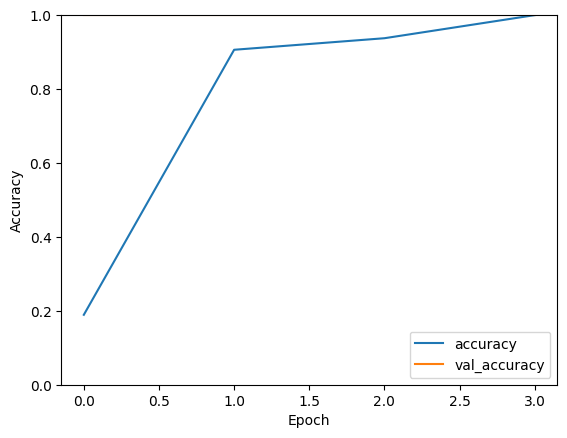

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/path_to_your_image.jpg'

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Base directory in Google Drive
base_dir = '/content/drive/MyDrive/lion_no_lion/stable'

# Verify directory structure and list files
for angle in os.listdir(base_dir):
    angle_path = os.path.join(base_dir, angle)
    if os.path.isdir(angle_path):
        print(f"Angle folder: {angle}")
        for category in os.listdir(angle_path):
            category_path = os.path.join(angle_path, category)
            print(f"  Contains category: {category}")
            print(f"    Files: {os.listdir(category_path)[:5]}")  # List first 5 files

# Data Preprocessing with Multiple Angles
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the data for validation
)

# Load training and validation data from all angles
angle_folders = ['angle 1', 'angle 2', 'angle 3', 'angle 4']

# Initialize empty lists for training and validation generators
train_generators = []
validation_generators = []

# Loop through each angle folder to create data generators
for angle in angle_folders:
    path = os.path.join(base_dir, angle)

    # Training generator
    train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='training'
    )

    # Validation generator
    validation_generator = train_datagen.flow_from_directory(
        path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='validation'
    )

    train_generators.append(train_generator)
    validation_generators.append(validation_generator)

# Combine generators if needed (more complex handling may be required)

# Now, you can continue with model creation and training as before

# Model Selection using a simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
Untitled documentUntitled document
# Compile the Model with Callbacks
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)

# Train the Model (example: combining first train generator for training)
history = model.fit(
    train_generators[0],  # You might need to combine generators
    steps_per_epoch=train_generators[0].samples // train_generators[0].batch_size,
    validation_data=validation_generators[0],
    validation_steps=validation_generators[0].samples // validation_generators[0].batch_size,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluation
loss, accuracy = model.evaluate(validation_generators[0])
print(f'Validation accuracy: {accuracy:.2f}')

# Plotting training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Prediction Function
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    return 'Lion' if predictions[0][0] > 0.5 else 'No Lion'

# Example usage
result = predict_image('/content/drive/MyDrive/path_to_your_image.jpg')  # Change to your test image path
print(result)
